<a href="https://colab.research.google.com/github/yiwenwangANU/pytorch_review/blob/main/04_pytorch_customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data download and explore

In [42]:
import torch
from torch.optim.lr_scheduler import StepLR
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [44]:
import os

for root, dirs, file in os.walk(path):
  print(f'Current directory: {root}')
  print(f'Subdirs: {dirs}')
  print(f'Number of Files: {len(file)}, Files: {file}')

Current directory: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2
Subdirs: ['train', 'raw-img', 'test']
Number of Files: 1, Files: ['translate.py']
Current directory: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/train
Subdirs: ['farfalla', 'scoiattolo', 'cavallo', 'pecora', 'elefante', 'ragno', 'gatto', 'mucca', 'cane', 'gallina']
Number of Files: 0, Files: []
Current directory: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/train/farfalla
Subdirs: []
Number of Files: 800, Files: ['OIP-4p0jCxIzKEHArDa1JocMkwHaDL.jpeg', 'OIP-WsTZhtAO3OQVuWktoX-IUAHaE9.jpeg', 'OIP-6Bam26g68QXMl0z2Lgw3WAHaFc.jpeg', 'OIP-jMB36p1pWAEzz3m2EdISlgHaFj.jpeg', 'e030b2092ce90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'OIP-kNRuj_9Z1VzhnLbUNW_L7gHaFj.jpeg', 'ea36b20c21f4013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg', 'OIP-ZvwAut30A7U_6VhDNcLaowHaHa.jpeg', 'ea37b2072bf6083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeeb

In [45]:
translate_path =  path + '/translate.py'
with open(translate_path, 'r') as file:
    content = file.read()
    print(content)

translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}



In [46]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "ragno": "spider", "squirrel": "scoiattolo"}

In [47]:
data_path = path + '/raw-img'
data_path

'/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img'

In [48]:
os.listdir(path)

['translate.py', 'train', 'raw-img', 'test']

In [49]:
import glob
total_images = glob.glob(data_path + "/**/*.jpeg") + glob.glob(data_path + "/**/*.jpg") + glob.glob(data_path + "/**/*.png")
print(f'Total number of animal images: {len(total_images)}')

Total number of animal images: 26179


In [50]:
for animal in os.listdir(data_path):
  curr_path = os.path.join(data_path, animal)
  images_number = len(glob.glob(curr_path + '/*.jpeg') + glob.glob(curr_path + '/*.jpg') + glob.glob(curr_path + '/*.png'))
  print(f'Number of {animal}: {images_number}')

Number of farfalla: 2112
Number of scoiattolo: 1862
Number of cavallo: 2623
Number of pecora: 1820
Number of elefante: 1446
Number of ragno: 4821
Number of gatto: 1668
Number of mucca: 1866
Number of cane: 4863
Number of gallina: 3098


In [51]:
#label encode aniaml classes
label_to_animal = {idx:animal for idx, animal in enumerate(os.listdir(data_path))}
label_to_animal

{0: 'farfalla',
 1: 'scoiattolo',
 2: 'cavallo',
 3: 'pecora',
 4: 'elefante',
 5: 'ragno',
 6: 'gatto',
 7: 'mucca',
 8: 'cane',
 9: 'gallina'}

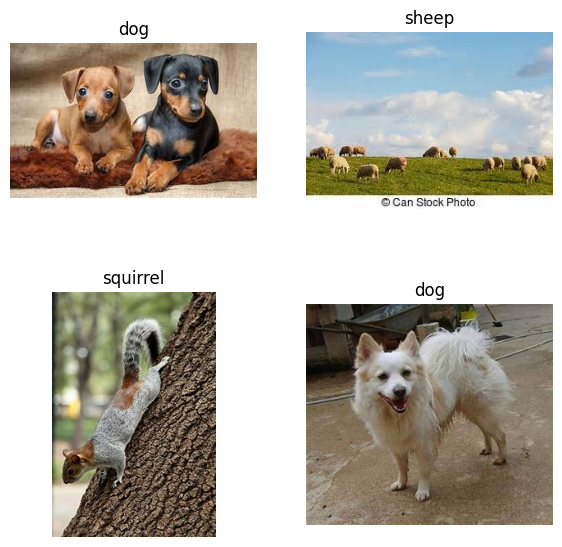

In [52]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def plotRandomImages(rootdir):
  images = glob.glob(rootdir + "/**/*.jpeg") + glob.glob(rootdir + "/**/*.jpg") + glob.glob(rootdir + "/**/*.png")
  plt.figure(figsize=(7, 7))
  for i in range(4):
    random_image = random.choice(images)
    img = Image.open(random_image)
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.imshow(img)
    animal_class = translate[random_image.split('/')[-2]]
    plt.title(animal_class)
  plt.show()

plotRandomImages(data_path)

###Data Preprocessing

In [53]:
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
train_dir

'/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/train'

In [54]:
import shutil

def recreate_dir(dir):
  if(os.path.exists(dir)):
    shutil.rmtree(dir)
  os.makedirs(dir)

recreate_dir(train_dir)
recreate_dir(test_dir)

os.listdir(path)

['translate.py', 'train', 'raw-img', 'test']

In [55]:
for label in os.listdir(data_path):
  os.makedirs(os.path.join(train_dir, label))
  os.makedirs(os.path.join(test_dir, label))
os.listdir(train_dir)

['farfalla',
 'scoiattolo',
 'cavallo',
 'pecora',
 'elefante',
 'ragno',
 'gatto',
 'mucca',
 'cane',
 'gallina']

In [56]:
for label in os.listdir(data_path):
  label_path = os.path.join(data_path, label)
  train_files = os.listdir(label_path)[:800]
  test_files = os.listdir(label_path)[800:1000]
  for file in train_files:
    file_path = os.path.join(label_path, file)
    shutil.copy(file_path, os.path.join(train_dir, label, file))
  for file in test_files:
    file_path = os.path.join(label_path, file)
    shutil.copy(file_path, os.path.join(test_dir, label, file))

In [57]:
for root, dirs, file in os.walk(train_dir):
  print(f'Current directory: {root}')
  print(f'Subdirs: {dirs}')
  print(f'Number of Files: {len(file)}, Files: {file}')

Current directory: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/train
Subdirs: ['farfalla', 'scoiattolo', 'cavallo', 'pecora', 'elefante', 'ragno', 'gatto', 'mucca', 'cane', 'gallina']
Number of Files: 0, Files: []
Current directory: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/train/farfalla
Subdirs: []
Number of Files: 800, Files: ['OIP-4p0jCxIzKEHArDa1JocMkwHaDL.jpeg', 'OIP-WsTZhtAO3OQVuWktoX-IUAHaE9.jpeg', 'OIP-6Bam26g68QXMl0z2Lgw3WAHaFc.jpeg', 'OIP-jMB36p1pWAEzz3m2EdISlgHaFj.jpeg', 'e030b2092ce90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'OIP-kNRuj_9Z1VzhnLbUNW_L7gHaFj.jpeg', 'ea36b20c21f4013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg', 'OIP-ZvwAut30A7U_6VhDNcLaowHaHa.jpeg', 'ea37b2072bf6083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg', 'OIP-K-ecda_CxoIhRGhGkbHADQHaFj.jpeg', 'OIP-mY9k6tLbM2yac2u7nioAFgHaEn.jpeg', 'OIP-sCSFgyoIipyXxaSAG4EZpgHaFj.jpeg', 'OIP-EeqrkQ2ayvBGB1C3b7iJFQHaE8.jpeg', 

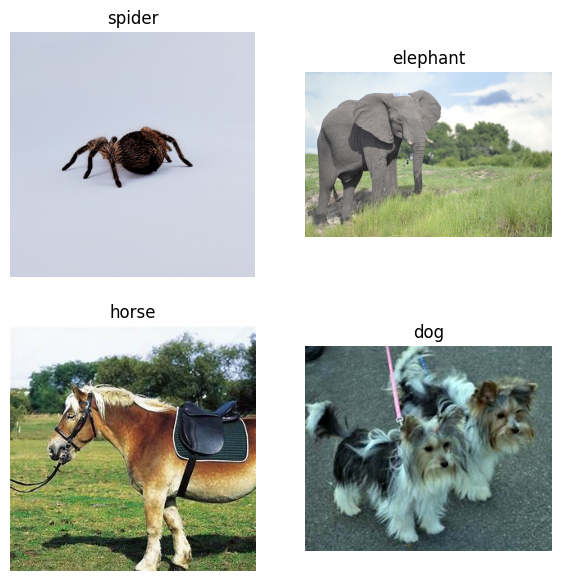

In [58]:
plotRandomImages(train_dir)

In [59]:
for root, dirs, file in os.walk(test_dir):
  print(f'Current directory: {root}')
  print(f'Subdirs: {dirs}')
  print(f'Number of Files: {len(file)}, Files: {file}')

Current directory: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/test
Subdirs: ['farfalla', 'scoiattolo', 'cavallo', 'pecora', 'elefante', 'ragno', 'gatto', 'mucca', 'cane', 'gallina']
Number of Files: 0, Files: []
Current directory: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/test/farfalla
Subdirs: []
Number of Files: 200, Files: ['eb32b6092afd043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png', 'ea36b30f2cf1013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg', 'OIP-pbWqGsPnLTIX2CFZxaIRTQHaE7.jpeg', 'OIP-Itwede89DDwSDt7DYTTONgHaLH.jpeg', 'OIP-UkIN9B-LjiJjWSp_PFdbDwHaEo.jpeg', 'OIP-BaLeSOIGawASi1KdS4iyGwHaJL.jpeg', 'OIP-wQOmAbCre0YrtKai_Ui56wHaDt.jpeg', 'ef3db70e29f31c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg', 'ea36b4082ff2093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg', 'OIP--v_vx0B7J5lpKWjLjknadQAAAA.jpeg', 'OIP-_yOn1UTUWB7kWNmQOt93QAAAAA.jpeg', 'OIP-2qYEjPwCw9W76LYFjAasCAHaFj.jpeg', 'O

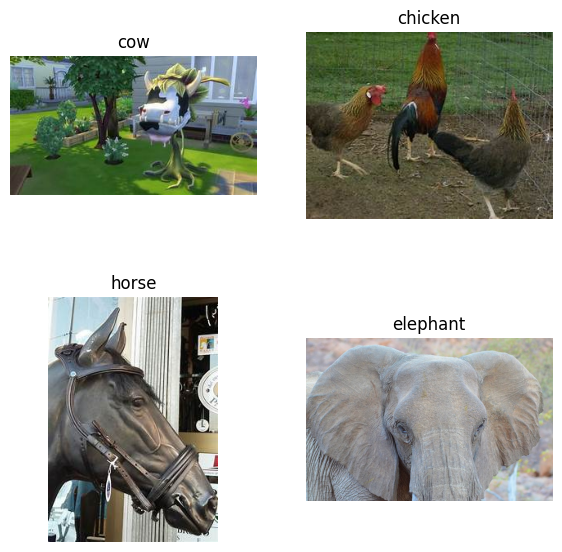

In [60]:
plotRandomImages(test_dir)

In [61]:
from torch.utils.data import Dataset

class AnimalDataset(Dataset):
  def __init__(self, root_dir, transform=None):
    self.root_dir = root_dir
    self.transform = transform
    self.image_paths = []
    self.labels = []
    self.label_dict = {idx:label for idx,label in enumerate(os.listdir(self.root_dir))} # {0: 'gatto',1: 'mucca', ...}
    self.count = 0

    for idx, label in self.label_dict.items():
      class_dir = os.path.join(root_dir, label)
      for file in os.listdir(class_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')) and self.count < 100: # use first 100 images in each class
          self.count += 1
          self.image_paths.append(os.path.join(class_dir, file))
          self.labels.append(idx)
      self.count = 0

  def __len__(self):
    return len(self.labels)


  def __getitem__(self, idx):
    image = Image.open(self.image_paths[idx]).convert("RGB")
    label = self.labels[idx]
    if self.transform:
      image = self.transform(image)
    return image, label

In [62]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),         # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),         # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

In [63]:
train_dataset = AnimalDataset(root_dir=train_dir, transform=train_transforms)
test_dataset = AnimalDataset(root_dir=test_dir, transform=test_transforms)

In [64]:
random_samples_idx = random.sample(range(len(train_dataset)), k=4)
random_samples_idx

[981, 620, 377, 649]

In [65]:
def plotRandomDataset(dataset):
  random_samples_idx = random.sample(range(len(dataset)), k=4)
  for i, sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[sample][0], dataset[sample][1]
    targ_image_adjust = targ_image.permute(1, 2, 0)
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.imshow(targ_image_adjust)
    animal_class = translate[label_to_animal[targ_label]]
    plt.title(animal_class)

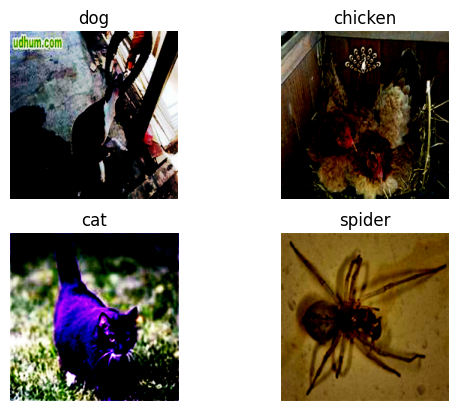

In [66]:
plotRandomDataset(train_dataset)

In [67]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 64

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [68]:
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Images shape: {images.shape}")  # Shape of the image tensor
    print(f"Labels shape: {labels.shape}")  # Shape of the label tensor
    print(f"Images data type: {images.dtype}")
    print(f"Labels data type: {labels.dtype}")
    print(f"First image tensor:\n{images[0]}")
    print(f"First label tensor: {labels[0]}")
    break  # Break after the first batch to avoid excessive output

Batch 1:
Images shape: torch.Size([64, 3, 224, 224])
Labels shape: torch.Size([64])
Images data type: torch.float32
Labels data type: torch.int64
First image tensor:
tensor([[[ 0.2784,  0.2784,  0.2784,  ...,  0.1529,  0.2314,  0.3098],
         [ 0.2706,  0.2706,  0.2784,  ...,  0.1529,  0.3647,  0.4039],
         [ 0.2549,  0.2314,  0.2471,  ...,  0.3255,  0.4745,  0.4980],
         ...,
         [ 0.4275,  0.4588,  0.4902,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.4588,  0.4824,  0.5059,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.4588, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[ 0.4431,  0.4431,  0.4431,  ...,  0.1373,  0.2078,  0.2863],
         [ 0.4431,  0.4510,  0.4588,  ...,  0.1373,  0.2941,  0.3020],
         [ 0.4353,  0.4275,  0.4353,  ...,  0.2784,  0.3412,  0.3255],
         ...,
         [ 0.3176,  0.3569,  0.3725,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.3569,  0.3804,  0.3961,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.3569, -1.0

###CNN Model

In [69]:
from torch import nn

class VGG16(nn.Module):
  def __init__(self):
    super().__init__()
    self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
    self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10),
        )
  def forward(self, x):
    x = self.features(x)
    x = torch.flatten(x, 1)  # Flatten the tensor
    x = self.classifier(x)
    return x

model = VGG16().to(device)

In [70]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
VGG16                                    [1, 10]                   --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [71]:
def train(model: torch.nn.Module,
          train_loader: torch.utils.data.DataLoader,
          test_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          scheduler: torch.optim.lr_scheduler,
          epoches: int = 10):

  for epoch in range(epoches):
    model.train()
    train_loss = 0.0
    for X_train, y_train in train_loader:
      X_train, y_train = X_train.to(device), y_train.to(device)
      y_logits = model(X_train)
      loss = loss_fn(y_logits, y_train)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    test_loss = 0.0
    correct = 0
    total = len(test_loader.dataset)
    with torch.inference_mode():
      for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        test_logits = model(X_test)
        loss = loss_fn(test_logits, y_test)
        test_pred = torch.argmax(test_logits, dim=1)
        test_loss += loss.item()
        correct += (test_pred == y_test).sum().item()
    test_loss /= len(test_loader)
    acc = correct / total
    scheduler.step()
    print(f'epoch: {epoch}, train_loss: {train_loss:.4f}, test loss: {test_loss:.4f}, test accuracy: {acc:.4f}')

In [73]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

train(model=model,
      train_loader=train_loader,
      test_loader=test_loader,
      loss_fn=nn.CrossEntropyLoss(),
      optimizer = optimizer,
      scheduler = scheduler,
      epoches=10)

epoch: 0, train_loss: 2.3032, test loss: 2.3025, test accuracy: 0.1000
epoch: 1, train_loss: 2.3031, test loss: 2.3025, test accuracy: 0.1000
epoch: 2, train_loss: 2.3028, test loss: 2.3025, test accuracy: 0.1000
epoch: 3, train_loss: 2.3029, test loss: 2.3025, test accuracy: 0.1000
epoch: 4, train_loss: 2.3030, test loss: 2.3026, test accuracy: 0.1000
epoch: 5, train_loss: 2.3026, test loss: 2.3026, test accuracy: 0.1000
epoch: 6, train_loss: 2.3026, test loss: 2.3026, test accuracy: 0.1000
epoch: 7, train_loss: 2.3025, test loss: 2.3026, test accuracy: 0.1000
epoch: 8, train_loss: 2.3026, test loss: 2.3026, test accuracy: 0.1000
epoch: 9, train_loss: 2.3025, test loss: 2.3026, test accuracy: 0.1000


In [74]:
from torchvision import models

# Load the VGG16 model (pretrained on ImageNet)
vgg16 = models.vgg16(pretrained=True)  # Set pretrained=False to initialize randomly

# Modify the classifier for your dataset (e.g., 10 classes)
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 4096),  # Input: 25088 (default VGG16 output)
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(4096, 1024),  # Additional layer
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),  # Additional layer
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(512, 10)  # Output layer for 10 classes
)
# Pretrained Features Frozen
for param in vgg16.features.parameters():
    param.requires_grad = False

vgg16 = vgg16.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 76.2MB/s]


In [75]:
optimizer = torch.optim.Adam(params=vgg16.parameters(), lr=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

train(model=vgg16,
      train_loader=train_loader,
      test_loader=test_loader,
      loss_fn=nn.CrossEntropyLoss(),
      optimizer = optimizer,
      scheduler = scheduler,
      epoches=10)

epoch: 0, train_loss: 2.1467, test loss: 1.5918, test accuracy: 0.7610
epoch: 1, train_loss: 1.5206, test loss: 0.7526, test accuracy: 0.8010
epoch: 2, train_loss: 0.9928, test loss: 0.4506, test accuracy: 0.8690
epoch: 3, train_loss: 0.7351, test loss: 0.3741, test accuracy: 0.8760
epoch: 4, train_loss: 0.5972, test loss: 0.3324, test accuracy: 0.8840
epoch: 5, train_loss: 0.5180, test loss: 0.3052, test accuracy: 0.8920
epoch: 6, train_loss: 0.4575, test loss: 0.2962, test accuracy: 0.8970
epoch: 7, train_loss: 0.4487, test loss: 0.2904, test accuracy: 0.8970
epoch: 8, train_loss: 0.4147, test loss: 0.2879, test accuracy: 0.9010
epoch: 9, train_loss: 0.4115, test loss: 0.2888, test accuracy: 0.8990


In [76]:
# Load EfficientNetB7 pretrained on ImageNet
efficientnet_b7 = models.efficientnet_b7(pretrained=True)

for param in efficientnet_b7.features.parameters():
    param.requires_grad = False

# Modify the classifier to match dataset
efficientnet_b7.classifier = nn.Sequential(
    nn.Linear(efficientnet_b7.classifier[1].in_features, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Dropout(0.5),
    nn.Linear(128, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256, 10)  # Output layer for 10 classes
)

efficientnet_b7 = efficientnet_b7.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:03<00:00, 82.5MB/s]


In [77]:
optimizer = torch.optim.Adam(efficientnet_b7.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

train(model=efficientnet_b7,
      train_loader=train_loader,
      test_loader=test_loader,
      loss_fn=nn.CrossEntropyLoss(),
      optimizer = optimizer,
      scheduler = scheduler,
      epoches=10)

epoch: 0, train_loss: 2.5140, test loss: 2.2896, test accuracy: 0.1000
epoch: 1, train_loss: 2.2580, test loss: 2.1152, test accuracy: 0.2520
epoch: 2, train_loss: 2.0285, test loss: 1.7150, test accuracy: 0.6610
epoch: 3, train_loss: 1.8792, test loss: 1.3531, test accuracy: 0.7810
epoch: 4, train_loss: 1.7352, test loss: 1.1392, test accuracy: 0.8150
epoch: 5, train_loss: 1.6099, test loss: 1.1498, test accuracy: 0.8060
epoch: 6, train_loss: 1.6262, test loss: 1.1520, test accuracy: 0.8000
epoch: 7, train_loss: 1.5880, test loss: 1.1570, test accuracy: 0.7960
epoch: 8, train_loss: 1.5496, test loss: 1.1562, test accuracy: 0.7920
epoch: 9, train_loss: 1.5583, test loss: 1.1619, test accuracy: 0.7930
